In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
files = glob.glob('../CONTPEAKS/RHC/*.csv')
files.sort()
#Number of Trials
trials = 3
#File name beginining
nb = 27
#File name ending
ne = -10
#Output file
name = '../CONTPEAKS/contpeaks.csv'
#Range
r = [5,10,50,100,200,300,400,500]

In [3]:
files

['../CONTPEAKS/RHC/CONTPEAKS_RHC_1_LOG.csv',
 '../CONTPEAKS/RHC/CONTPEAKS_RHC_2_LOG.csv',
 '../CONTPEAKS/RHC/CONTPEAKS_RHC_3_LOG.csv']

In [4]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [5]:
##TEST##
# df_concats = []
# df_tests = []
# for x in range(0,len(dfs),trials):
#     df_concat = pd.concat((dfs[x],dfs[x+1]))
#     df_test = pd.concat([dfs[x+i] for i in range(trials)])


In [6]:
##TEST##
# by_row_index = df_concat.groupby(df_concat.index)
# df_means = by_row_index.mean()
# df_concats.append(df_means.loc[r])
# df_concats

In [7]:
##TEST##
# by_row_index = df_test.groupby(df_test.index)
# df_means = by_row_index.mean()
# df_tests.append(df_means.loc[r])
# df_tests

In [8]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

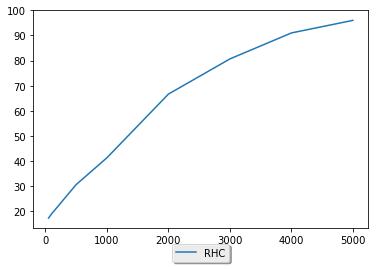

In [9]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

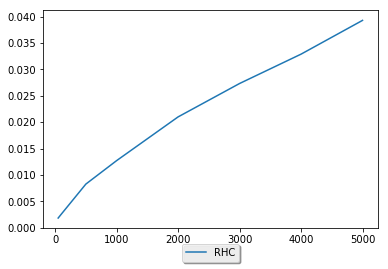

In [10]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [11]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 RHC


In [12]:
#Change this
df = df_concats[0]
df

,iterations,fitness,time,fevals
5,50,17.333333,0.001829,61
10,100,19.000000,0.002553,111
50,500,30.666667,0.008259,511
100,1000,41.333333,0.012702,1011
200,2000,66.666667,0.020987,2011
300,3000,80.666667,0.027316,3011
400,4000,91.000000,0.032877,4011
500,5000,96.000000,0.039275,5011


In [13]:
with open(name, 'w') as f:
    f.write('#RHC\n')
df.to_csv(name, sep=',', mode='a', header=True)